In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
it = -1
with h5py.File('snapshots/snapshots_s1.h5', 'r') as f:
    velocity = f['tasks']['velocity']
    t = velocity.dims[0]['sim_time'][it]
    x = velocity.dims[2][0][:].ravel()
    y = velocity.dims[3][0][:].ravel()
    u = velocity[it, 0, :, :]
    v = velocity[it, 1, :, :]


In [3]:
X, Y = np.meshgrid(x, y, indexing='ij')
Reynolds = 100.0; nu = 1/Reynolds
Ft = np.exp(-2*nu*t)
u_a = np.sin(X)*np.cos(Y)*Ft
v_a = -np.cos(X)*np.sin(Y)*Ft

print(np.linalg.norm(u - u_a))
print(np.linalg.norm(v - v_a))

1.8308684637189762e-09
1.8308685249684828e-09


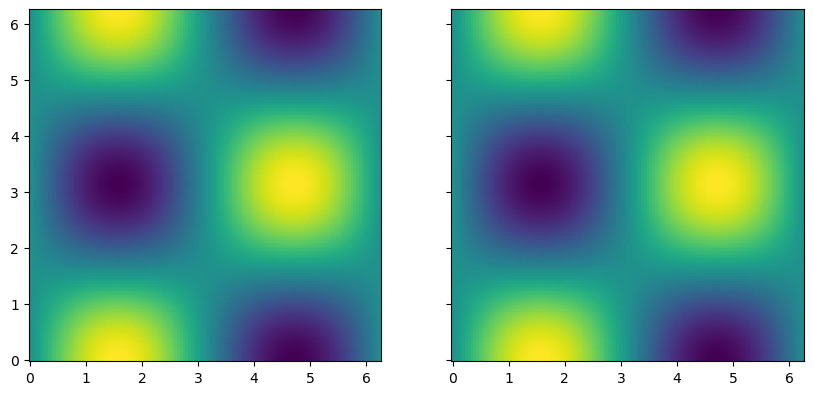

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
ax[0].set_aspect('equal'); ax[1].set_aspect('equal')
ax[0].pcolormesh(X, Y, u)
ax[1].pcolormesh(X, Y, u_a)